ID: ASGN2602
K-Means Clustering on Student Performance Data

Objective: Segment students into distinct groups based on their academic performance and study habits.

Dataset: Student Performance Dataset

Tasks:
1. Preprocess the data: Handle missing values, normalize features, encode categorical variables.

2. Use the Elbow Method: Determine the optimal number of clusters.

3. Apply K-Means clustering: Segment students based on performance metrics.

4. Visualize the clusters: Use a scatter plot and/or other relevant visualizations.

5. Interpret the characteristics of each cluster: Analyze the performance and study habits of each cluster.

Deliverables:

- A Jupyter Notebook with code and visualizations.

- A report summarizing the cluster characteristics.

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [172]:
std_df = pd.read_csv('student_performance_dataset.csv')
std_df

,StudentID,Gender,Age,StudyHours,GPA,Attendance,Participation,AssignmentsCompleted,ProjectsCompleted,Extracurriculars
0,1,Male,19,13.27,NaN,70.22,8.72,3.0,2.0,Sports
1,2,Female,23,5.17,3.71,58.10,8.62,12.0,3.0,Clubs
2,3,Male,21,6.93,1.93,85.04,9.34,8.0,0.0,Arts
3,4,Male,22,6.22,1.26,96.34,8.94,8.0,0.0,Arts
4,5,Male,22,0.20,3.16,68.77,7.76,18.0,1.0,Arts
...,...,...,...,...,...,...,...,...,...,...
2995,2996,Male,23,9.16,1.65,98.47,0.89,9.0,4.0,NaN
2996,2997,Male,18,0.02,3.51,75.13,0.10,19.0,3.0,Sports
2997,2998,Male,23,13.41,0.50,NaN,0.17,10.0,3.0,Arts
2998,2999,Female,22,NaN,3.50,82.93,4.08,1.0,4.0,Sports


In [173]:
std_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   StudentID             3000 non-null   int64  
 1   Gender                3000 non-null   object 
 2   Age                   3000 non-null   int64  
 3   StudyHours            2850 non-null   float64
 4   GPA                   2850 non-null   float64
 5   Attendance            2850 non-null   float64
 6   Participation         2850 non-null   float64
 7   AssignmentsCompleted  2850 non-null   float64
 8   ProjectsCompleted     2850 non-null   float64
 9   Extracurriculars      2241 non-null   object 
dtypes: float64(6), int64(2), object(2)
memory usage: 234.5+ KB


In [174]:
std_df.describe()

,StudentID,Age,StudyHours,GPA,Attendance,Participation,AssignmentsCompleted,ProjectsCompleted
count,3000.000000,3000.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000
mean,1500.500000,20.973000,7.371270,2.027614,74.993993,4.995260,9.596491,2.071579
std,866.169729,1.980298,4.356294,1.150193,14.398112,2.865643,5.784353,1.417362
min,1.000000,18.000000,0.000000,0.010000,50.010000,0.000000,0.000000,0.000000
25%,750.750000,19.000000,3.567500,1.060000,62.840000,2.512500,5.000000,1.000000
50%,1500.500000,21.000000,7.370000,2.050000,74.850000,5.020000,10.000000,2.000000
75%,2250.250000,23.000000,11.177500,3.020000,87.260000,7.427500,15.000000,3.000000
max,3000.000000,24.000000,15.000000,4.000000,99.980000,10.000000,19.000000,4.000000


In [175]:
# Duplicate rows
std_df.duplicated().sum()

np.int64(0)

In [176]:
std_df[std_df.duplicated()]

,StudentID,Gender,Age,StudyHours,GPA,Attendance,Participation,AssignmentsCompleted,ProjectsCompleted,Extracurriculars


In [177]:
std_df['StudentID'].duplicated().sum()

np.int64(0)

In [178]:
# Dropping unnecessary columns
std_df = std_df.drop(columns='StudentID')

In [179]:
for col in std_df.columns:
    print(std_df[col].value_counts(dropna=False), end='\n\n')

Gender
Male      1517
Female    1483
Name: count, dtype: int64

Age
21    460
18    442
22    442
20    427
23    422
19    407
24    400
Name: count, dtype: int64

StudyHours
NaN      150
1.15       7
7.71       7
7.85       7
12.95      7
        ... 
13.20      1
5.75       1
4.82       1
7.79       1
4.36       1
Name: count, Length: 1281, dtype: int64

GPA
NaN     150
3.50     15
1.93     15
1.17     15
0.42     15
       ... 
2.38      2
2.45      2
0.89      2
3.80      1
0.87      1
Name: count, Length: 401, dtype: int64

Attendance
NaN      150
51.21      5
62.80      4
89.65      4
62.82      4
        ... 
90.48      1
77.68      1
92.33      1
91.15      1
96.19      1
Name: count, Length: 2182, dtype: int64

Participation
NaN     150
1.00      9
5.60      9
9.38      9
5.65      9
       ... 
8.66      1
5.48      1
0.05      1
4.38      1
0.89      1
Name: count, Length: 954, dtype: int64

AssignmentsCompleted
9.0     173
15.0    162
5.0     156
1.0     155
16.0    151
17

In [180]:
cols = std_df.columns
num_cols = std_df.select_dtypes(exclude='object').columns
cat_cols = std_df.select_dtypes(include='object').columns

cols, num_cols, cat_cols

(Index(['Gender', 'Age', 'StudyHours', 'GPA', 'Attendance', 'Participation',
        'AssignmentsCompleted', 'ProjectsCompleted', 'Extracurriculars'],
       dtype='object'),
 Index(['Age', 'StudyHours', 'GPA', 'Attendance', 'Participation',
        'AssignmentsCompleted', 'ProjectsCompleted'],
       dtype='object'),
 Index(['Gender', 'Extracurriculars'], dtype='object'))

In [181]:
# Handling na values
std_df.isna().sum()

Gender                    0
Age                       0
StudyHours              150
GPA                     150
Attendance              150
Participation           150
AssignmentsCompleted    150
ProjectsCompleted       150
Extracurriculars        759
dtype: int64

In [182]:
std_df[std_df.isna().sum(axis=1).astype(bool)]

,Gender,Age,StudyHours,GPA,Attendance,Participation,AssignmentsCompleted,ProjectsCompleted,Extracurriculars
0,Male,19,13.27,NaN,70.22,8.72,3.0,2.0,Sports
5,Female,19,4.44,2.73,62.08,7.18,2.0,4.0,NaN
6,Male,18,6.89,3.56,77.74,2.65,11.0,2.0,NaN
7,Male,21,6.17,2.77,89.81,6.21,10.0,3.0,NaN
9,Female,19,5.77,3.73,81.57,8.62,10.0,3.0,NaN
...,...,...,...,...,...,...,...,...,...
2994,Female,24,14.33,NaN,96.20,6.06,12.0,3.0,Clubs
2995,Male,23,9.16,1.65,98.47,0.89,9.0,4.0,NaN
2997,Male,23,13.41,0.50,NaN,0.17,10.0,3.0,Arts
2998,Female,22,NaN,3.50,82.93,4.08,1.0,4.0,Sports


In [183]:
std_df.describe()

,Age,StudyHours,GPA,Attendance,Participation,AssignmentsCompleted,ProjectsCompleted
count,3000.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000
mean,20.973000,7.371270,2.027614,74.993993,4.995260,9.596491,2.071579
std,1.980298,4.356294,1.150193,14.398112,2.865643,5.784353,1.417362
min,18.000000,0.000000,0.010000,50.010000,0.000000,0.000000,0.000000
25%,19.000000,3.567500,1.060000,62.840000,2.512500,5.000000,1.000000
50%,21.000000,7.370000,2.050000,74.850000,5.020000,10.000000,2.000000
75%,23.000000,11.177500,3.020000,87.260000,7.427500,15.000000,3.000000
max,24.000000,15.000000,4.000000,99.980000,10.000000,19.000000,4.000000


In [184]:
# Imputing NA values with KNN
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

na_cols = ['StudyHours', 'GPA', 'Attendance', 'Participation', 'AssignmentsCompleted', 'ProjectsCompleted']

std_df[na_cols] = imputer.fit_transform(std_df[na_cols])

In [185]:
for col in cat_cols:
    print(std_df[col].value_counts(dropna=False))

Gender
Male      1517
Female    1483
Name: count, dtype: int64
Extracurriculars
Clubs     776
NaN       759
Sports    737
Arts      728
Name: count, dtype: int64


In [186]:
# Encoding categorical features
# Marking NA values in Extra Curricular as None
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in cat_cols:
    std_df[col] = encoder.fit_transform(std_df[col])

In [187]:
for col in cat_cols:
    print(std_df[col].value_counts())

Gender
1    1517
0    1483
Name: count, dtype: int64
Extracurriculars
1    776
3    759
2    737
0    728
Name: count, dtype: int64


In [188]:
# Converting features from float to integers
std_df = std_df.astype({col: 'int64' for col in ['AssignmentsCompleted','ProjectsCompleted']})

In [189]:
std_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                3000 non-null   int64  
 1   Age                   3000 non-null   int64  
 2   StudyHours            3000 non-null   float64
 3   GPA                   3000 non-null   float64
 4   Attendance            3000 non-null   float64
 5   Participation         3000 non-null   float64
 6   AssignmentsCompleted  3000 non-null   int64  
 7   ProjectsCompleted     3000 non-null   int64  
 8   Extracurriculars      3000 non-null   int64  
dtypes: float64(4), int64(5)
memory usage: 211.1 KB


In [190]:
std_df.describe()

,Gender,Age,StudyHours,GPA,Attendance,Participation,AssignmentsCompleted,ProjectsCompleted,Extracurriculars
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.505667,20.973000,7.357735,2.028213,75.059987,4.982118,9.581333,2.056333,1.509000
std,0.500051,1.980298,4.264909,1.126560,14.103696,2.806904,5.658980,1.391572,1.114301
min,0.000000,18.000000,0.000000,0.010000,50.010000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.000000,3.787500,1.100000,63.425000,2.650000,5.000000,1.000000,1.000000
50%,1.000000,21.000000,7.326000,2.050000,75.135000,4.940000,9.000000,2.000000,1.000000
75%,1.000000,23.000000,10.975000,2.980000,86.727500,7.300000,15.000000,3.000000,3.000000
max,1.000000,24.000000,15.000000,4.000000,99.980000,10.000000,19.000000,4.000000,3.000000


In [191]:
cols = std_df.columns.tolist()
num_cols = ['Age', 'StudyHours', 'GPA', 'Attendance', 'Participation', 'AssignmentsCompleted', 'ProjectsCompleted']
cat_cols = ['Gender', 'Extracurriculars']

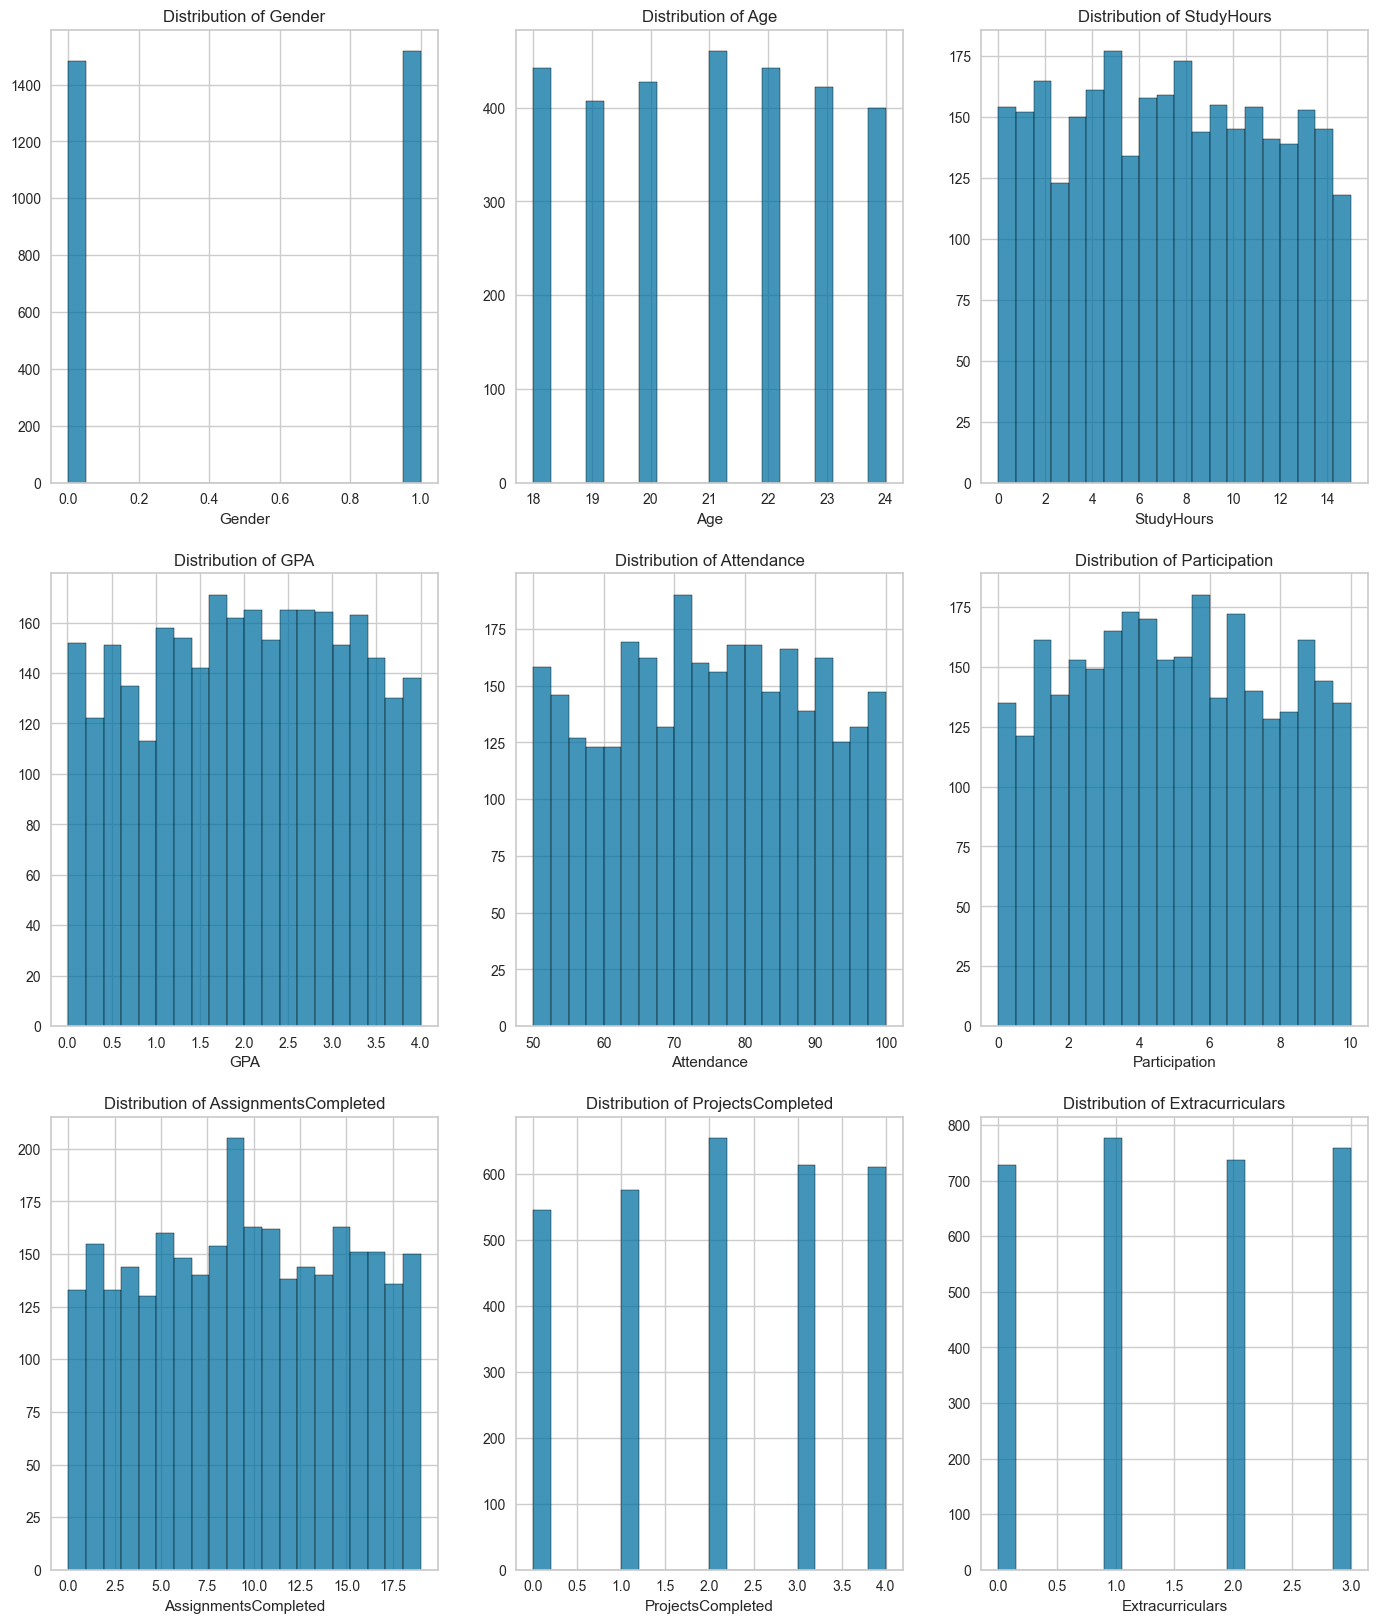

In [192]:
# Distribution of features
plt.figure(figsize=(17,20))

for i, col in enumerate(cols):
    plt.subplot(3,3,i+1)
    sns.histplot(data=std_df, x=col, bins=20)
    plt.xlabel(col)
    plt.ylabel('')
    plt.title(f'Distribution of {col}')
plt.show()

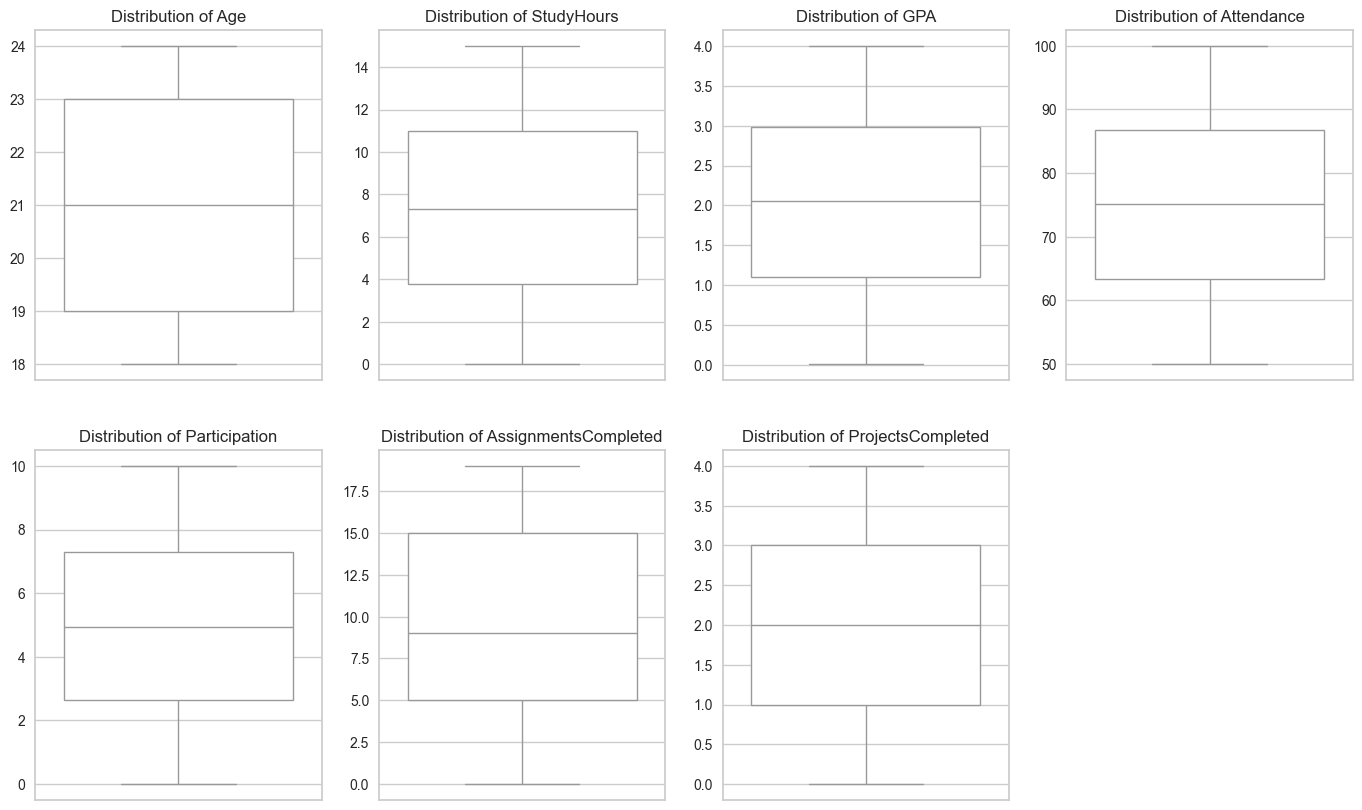

In [193]:
# Boxplot of numeric features
plt.figure(figsize=(17,10))

for i, col in enumerate(num_cols):
    plt.subplot(2,4,i+1)
    sns.boxplot(std_df[col], color='White')
    plt.ylabel('')
    plt.title(f'Distribution of {col}')
plt.show()

In [194]:
std_df

,Gender,Age,StudyHours,GPA,Attendance,Participation,AssignmentsCompleted,ProjectsCompleted,Extracurriculars
0,1,19,13.270,1.61,70.220,8.72,3,2,2
1,0,23,5.170,3.71,58.100,8.62,12,3,1
2,1,21,6.930,1.93,85.040,9.34,8,0,0
3,1,22,6.220,1.26,96.340,8.94,8,0,0
4,1,22,0.200,3.16,68.770,7.76,18,1,0
...,...,...,...,...,...,...,...,...,...
2995,1,23,9.160,1.65,98.470,0.89,9,4,3
2996,1,18,0.020,3.51,75.130,0.10,19,3,2
2997,1,23,13.410,0.50,82.922,0.17,10,3,0
2998,0,22,4.994,3.50,82.930,4.08,1,4,2


In [195]:
std_df.describe()

,Gender,Age,StudyHours,GPA,Attendance,Participation,AssignmentsCompleted,ProjectsCompleted,Extracurriculars
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.505667,20.973000,7.357735,2.028213,75.059987,4.982118,9.581333,2.056333,1.509000
std,0.500051,1.980298,4.264909,1.126560,14.103696,2.806904,5.658980,1.391572,1.114301
min,0.000000,18.000000,0.000000,0.010000,50.010000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.000000,3.787500,1.100000,63.425000,2.650000,5.000000,1.000000,1.000000
50%,1.000000,21.000000,7.326000,2.050000,75.135000,4.940000,9.000000,2.000000,1.000000
75%,1.000000,23.000000,10.975000,2.980000,86.727500,7.300000,15.000000,3.000000,3.000000
max,1.000000,24.000000,15.000000,4.000000,99.980000,10.000000,19.000000,4.000000,3.000000


In [196]:
# Scaling features within 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scale_cols = ['Age', 'StudyHours', 'GPA', 'Attendance', 'Participation', 'AssignmentsCompleted', 'ProjectsCompleted']

scaled_cols = [col+'_scaled' for col in scale_cols]

std_df[scaled_cols] = scaler.fit_transform(std_df[scale_cols])
std_df[scaled_cols]

,Age_scaled,StudyHours_scaled,GPA_scaled,Attendance_scaled,Participation_scaled,AssignmentsCompleted_scaled,ProjectsCompleted_scaled
0,0.166667,0.884667,0.401003,0.404443,0.872,0.157895,0.50
1,0.833333,0.344667,0.927318,0.161897,0.862,0.631579,0.75
2,0.500000,0.462000,0.481203,0.701021,0.934,0.421053,0.00
3,0.666667,0.414667,0.313283,0.927156,0.894,0.421053,0.00
4,0.666667,0.013333,0.789474,0.375425,0.776,0.947368,0.25
...,...,...,...,...,...,...,...
2995,0.833333,0.610667,0.411028,0.969782,0.089,0.473684,1.00
2996,0.000000,0.001333,0.877193,0.502702,0.010,1.000000,0.75
2997,0.833333,0.894000,0.122807,0.658635,0.017,0.526316,0.75
2998,0.666667,0.332933,0.874687,0.658795,0.408,0.052632,1.00


In [197]:
# Creating a Student Score with sum of all feature values with weights GPA: 30%, Assignments and Projects: 200% and remaining 10%

score_cols = ['StudyHours_scaled','GPA_scaled','Attendance_scaled','Participation_scaled','AssignmentsCompleted_scaled','ProjectsCompleted_scaled']

std_weights = [0.1, 0.3, 0.1, 0.1, 0.2, 0.2]

std_df['StdScore'] = (std_df[score_cols] * std_weights).sum(axis=1)
std_df

,Gender,Age,StudyHours,GPA,Attendance,Participation,AssignmentsCompleted,ProjectsCompleted,Extracurriculars,Age_scaled,StudyHours_scaled,GPA_scaled,Attendance_scaled,Participation_scaled,AssignmentsCompleted_scaled,ProjectsCompleted_scaled,StdScore
0,1,19,13.270,1.61,70.220,8.72,3,2,2,0.166667,0.884667,0.401003,0.404443,0.872,0.157895,0.50,0.467991
1,0,23,5.170,3.71,58.100,8.62,12,3,1,0.833333,0.344667,0.927318,0.161897,0.862,0.631579,0.75,0.691368
2,1,21,6.930,1.93,85.040,9.34,8,0,0,0.500000,0.462000,0.481203,0.701021,0.934,0.421053,0.00,0.438273
3,1,22,6.220,1.26,96.340,8.94,8,0,0,0.666667,0.414667,0.313283,0.927156,0.894,0.421053,0.00,0.401778
4,1,22,0.200,3.16,68.770,7.76,18,1,0,0.666667,0.013333,0.789474,0.375425,0.776,0.947368,0.25,0.592792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1,23,9.160,1.65,98.470,0.89,9,4,3,0.833333,0.610667,0.411028,0.969782,0.089,0.473684,1.00,0.584990
2996,1,18,0.020,3.51,75.130,0.10,19,3,2,0.000000,0.001333,0.877193,0.502702,0.010,1.000000,0.75,0.664561
2997,1,23,13.410,0.50,82.922,0.17,10,3,0,0.833333,0.894000,0.122807,0.658635,0.017,0.526316,0.75,0.449069
2998,0,22,4.994,3.50,82.930,4.08,1,4,2,0.666667,0.332933,0.874687,0.658795,0.408,0.052632,1.00,0.612905


In [198]:
std_df.describe()

,Gender,Age,StudyHours,GPA,Attendance,Participation,AssignmentsCompleted,ProjectsCompleted,Extracurriculars,Age_scaled,StudyHours_scaled,GPA_scaled,Attendance_scaled,Participation_scaled,AssignmentsCompleted_scaled,ProjectsCompleted_scaled,StdScore
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.505667,20.973000,7.357735,2.028213,75.059987,4.982118,9.581333,2.056333,1.509000,0.495500,0.490516,0.505818,0.501301,0.498212,0.504281,0.514083,0.504421
std,0.500051,1.980298,4.264909,1.126560,14.103696,2.806904,5.658980,1.391572,1.114301,0.330050,0.284327,0.282346,0.282243,0.280690,0.297841,0.347893,0.133917
min,0.000000,18.000000,0.000000,0.010000,50.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.089896
25%,0.000000,19.000000,3.787500,1.100000,63.425000,2.650000,5.000000,1.000000,1.000000,0.166667,0.252500,0.273183,0.268461,0.265000,0.263158,0.250000,0.412185
50%,1.000000,21.000000,7.326000,2.050000,75.135000,4.940000,9.000000,2.000000,1.000000,0.500000,0.488400,0.511278,0.502802,0.494000,0.473684,0.500000,0.503742
75%,1.000000,23.000000,10.975000,2.980000,86.727500,7.300000,15.000000,3.000000,3.000000,0.833333,0.731667,0.744361,0.734791,0.730000,0.789474,0.750000,0.597941
max,1.000000,24.000000,15.000000,4.000000,99.980000,10.000000,19.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.887321


In [199]:
normal_cols = ['Gender', 'Age','StudyHours','GPA','Attendance','Participation','AssignmentsCompleted','ProjectsCompleted','StdScore']
cluster_cols = ['Gender', 'Age_scaled','StudyHours_scaled','GPA_scaled','Attendance_scaled','Participation_scaled','AssignmentsCompleted_scaled','ProjectsCompleted_scaled','StdScore']
std_df[cluster_cols]

,Gender,Age_scaled,StudyHours_scaled,GPA_scaled,Attendance_scaled,Participation_scaled,AssignmentsCompleted_scaled,ProjectsCompleted_scaled,StdScore
0,1,0.166667,0.884667,0.401003,0.404443,0.872,0.157895,0.50,0.467991
1,0,0.833333,0.344667,0.927318,0.161897,0.862,0.631579,0.75,0.691368
2,1,0.500000,0.462000,0.481203,0.701021,0.934,0.421053,0.00,0.438273
3,1,0.666667,0.414667,0.313283,0.927156,0.894,0.421053,0.00,0.401778
4,1,0.666667,0.013333,0.789474,0.375425,0.776,0.947368,0.25,0.592792
...,...,...,...,...,...,...,...,...,...
2995,1,0.833333,0.610667,0.411028,0.969782,0.089,0.473684,1.00,0.584990
2996,1,0.000000,0.001333,0.877193,0.502702,0.010,1.000000,0.75,0.664561
2997,1,0.833333,0.894000,0.122807,0.658635,0.017,0.526316,0.75,0.449069
2998,0,0.666667,0.332933,0.874687,0.658795,0.408,0.052632,1.00,0.612905


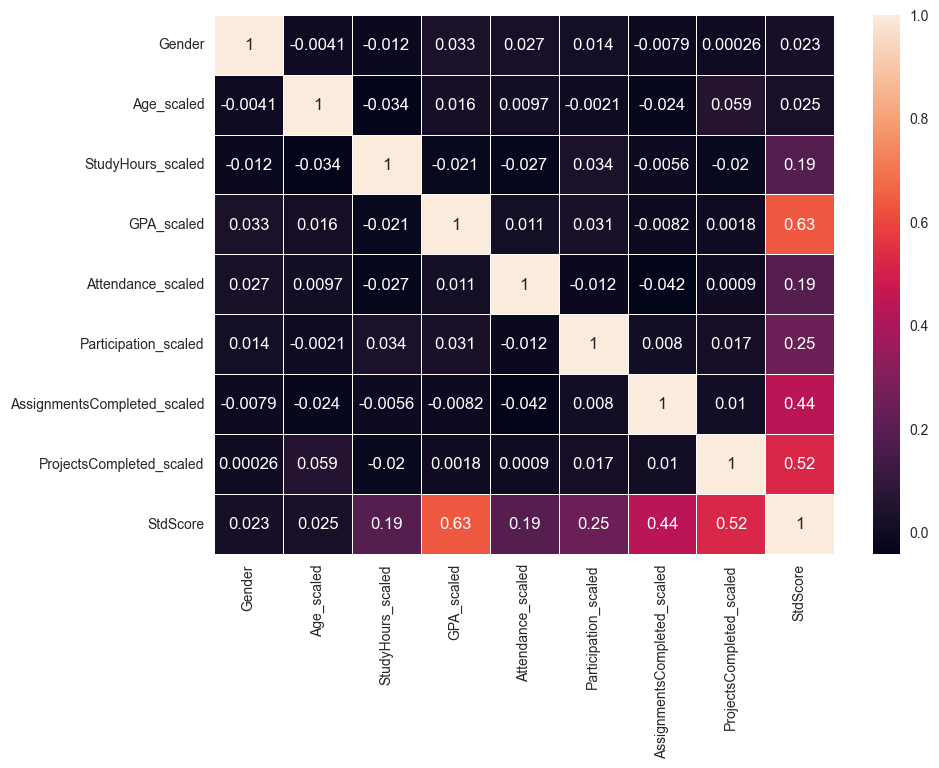

In [200]:
# Correlation of features
std_corr = std_df[cluster_cols].corr()

plt.figure(figsize=(10,7))
sns.heatmap(std_corr, annot=True, linewidths=0.5)
plt.show()

In [201]:
# Data to cluster
std_cluster = std_df[cluster_cols]
std_cluster

,Gender,Age_scaled,StudyHours_scaled,GPA_scaled,Attendance_scaled,Participation_scaled,AssignmentsCompleted_scaled,ProjectsCompleted_scaled,StdScore
0,1,0.166667,0.884667,0.401003,0.404443,0.872,0.157895,0.50,0.467991
1,0,0.833333,0.344667,0.927318,0.161897,0.862,0.631579,0.75,0.691368
2,1,0.500000,0.462000,0.481203,0.701021,0.934,0.421053,0.00,0.438273
3,1,0.666667,0.414667,0.313283,0.927156,0.894,0.421053,0.00,0.401778
4,1,0.666667,0.013333,0.789474,0.375425,0.776,0.947368,0.25,0.592792
...,...,...,...,...,...,...,...,...,...
2995,1,0.833333,0.610667,0.411028,0.969782,0.089,0.473684,1.00,0.584990
2996,1,0.000000,0.001333,0.877193,0.502702,0.010,1.000000,0.75,0.664561
2997,1,0.833333,0.894000,0.122807,0.658635,0.017,0.526316,0.75,0.449069
2998,0,0.666667,0.332933,0.874687,0.658795,0.408,0.052632,1.00,0.612905


In [202]:
std_cluster.columns = ['Gender','Age','StudyHours','GPA','Attendance','Participation','AssignmentsCompleted','ProjectsCompleted','StdScore']

In [203]:
std_cluster

,Gender,Age,StudyHours,GPA,Attendance,Participation,AssignmentsCompleted,ProjectsCompleted,StdScore
0,1,0.166667,0.884667,0.401003,0.404443,0.872,0.157895,0.50,0.467991
1,0,0.833333,0.344667,0.927318,0.161897,0.862,0.631579,0.75,0.691368
2,1,0.500000,0.462000,0.481203,0.701021,0.934,0.421053,0.00,0.438273
3,1,0.666667,0.414667,0.313283,0.927156,0.894,0.421053,0.00,0.401778
4,1,0.666667,0.013333,0.789474,0.375425,0.776,0.947368,0.25,0.592792
...,...,...,...,...,...,...,...,...,...
2995,1,0.833333,0.610667,0.411028,0.969782,0.089,0.473684,1.00,0.584990
2996,1,0.000000,0.001333,0.877193,0.502702,0.010,1.000000,0.75,0.664561
2997,1,0.833333,0.894000,0.122807,0.658635,0.017,0.526316,0.75,0.449069
2998,0,0.666667,0.332933,0.874687,0.658795,0.408,0.052632,1.00,0.612905


In [158]:
# Using K Elbow to find correct no.of clusters
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

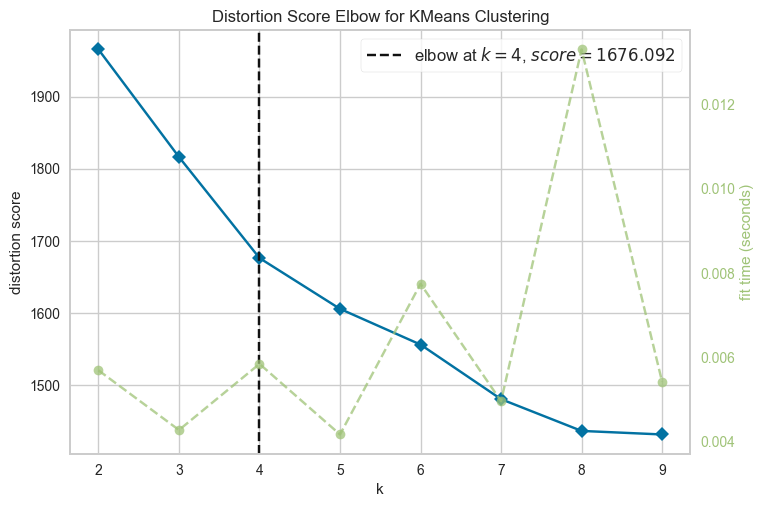

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [206]:
k_means = KMeans()
elbow = KElbowVisualizer(k_means, k=(2,10))
elbow.fit(std_cluster)
elbow.show()

In [207]:
k_means= KMeans(n_clusters=elbow.elbow_value_)
k_means.fit(std_cluster)

KMeans(n_clusters=np.int64(4))

In [208]:
# ordering cluster method
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

In [209]:
# Creating StdCluster with labels ordered with StdScore
# higher std score, std cluster number is higher performing student

std_cluster['StdCluster'] = k_means.labels_
std_cluster = order_cluster('StdCluster', 'StdScore', std_cluster, True)

C:\Users\vishw\AppData\Local\Temp\ipykernel_4684\1164928279.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  std_cluster['StdCluster'] = k_means.labels_


In [210]:
std_cluster['StdCluster'].value_counts()

StdCluster
2    795
1    761
3    756
0    688
Name: count, dtype: int64

In [211]:
std_cluster

,Gender,Age,StudyHours,GPA,Attendance,Participation,AssignmentsCompleted,ProjectsCompleted,StdScore,StdCluster
0,1,0.166667,0.884667,0.401003,0.404443,0.872,0.157895,0.50,0.467991,1
1,0,0.833333,0.344667,0.927318,0.161897,0.862,0.631579,0.75,0.691368,2
2,1,0.500000,0.462000,0.481203,0.701021,0.934,0.421053,0.00,0.438273,1
3,1,0.666667,0.414667,0.313283,0.927156,0.894,0.421053,0.00,0.401778,1
4,1,0.666667,0.013333,0.789474,0.375425,0.776,0.947368,0.25,0.592792,1
...,...,...,...,...,...,...,...,...,...,...
2995,1,0.833333,0.610667,0.411028,0.969782,0.089,0.473684,1.00,0.584990,3
2996,1,0.000000,0.001333,0.877193,0.502702,0.010,1.000000,0.75,0.664561,3
2997,1,0.833333,0.894000,0.122807,0.658635,0.017,0.526316,0.75,0.449069,3
2998,0,0.666667,0.332933,0.874687,0.658795,0.408,0.052632,1.00,0.612905,2


In [212]:
# Mean value of student metrics for each cluster
compare_cols = std_cluster.columns[:-1]

std_cluster.groupby('StdCluster')[compare_cols].mean()

,Gender,Age,StudyHours,GPA,Attendance,Participation,AssignmentsCompleted,ProjectsCompleted,StdScore
StdCluster,,,,,,,,,
0,0.0,0.431686,0.487431,0.466124,0.456968,0.473347,0.512087,0.203488,0.424727
1,1.0,0.430793,0.512517,0.503344,0.516088,0.491415,0.455841,0.221091,0.438391
2,0.0,0.553249,0.499621,0.522761,0.525407,0.512442,0.501953,0.782704,0.567507
3,1.0,0.557981,0.461602,0.526614,0.501410,0.512717,0.548385,0.809193,0.577073


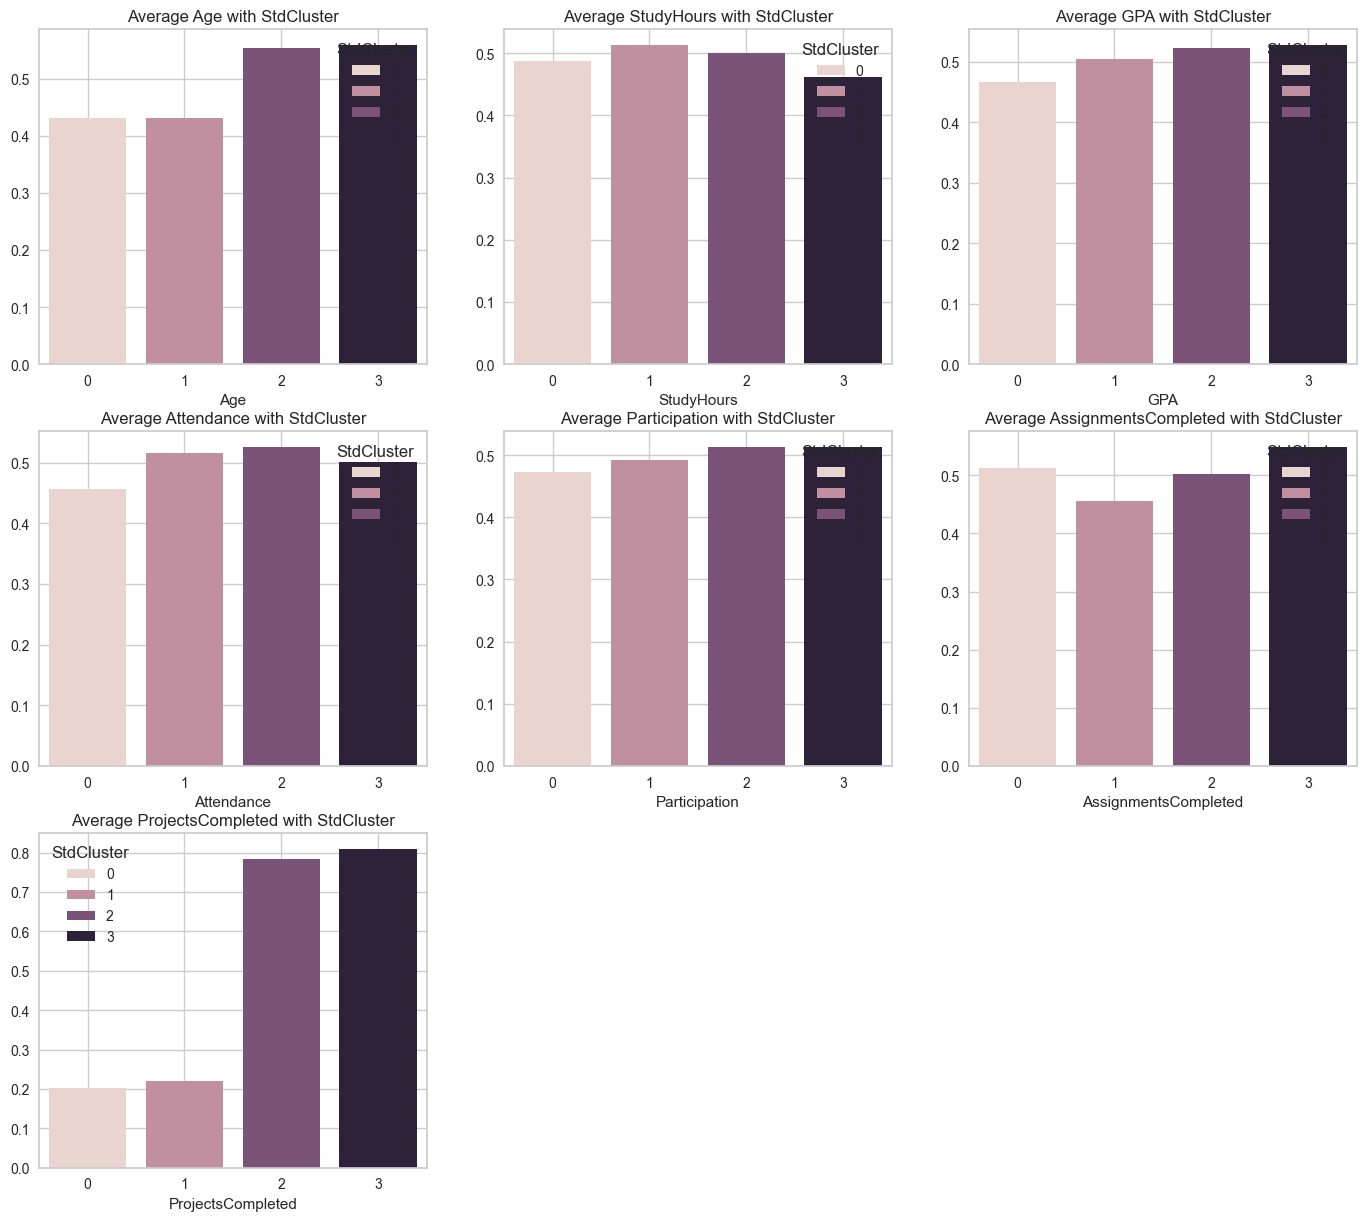

In [213]:
# Count plots of categorical fields with survived
plt.figure(figsize=(17,20))

for i, col in enumerate(compare_cols[1:-1]):
    plt.subplot(4,3,i+1)
    sns.barplot(data=std_cluster, x='StdCluster', y=col, hue='StdCluster', errorbar=None)
    plt.xlabel(col)
    plt.ylabel('')
    plt.grid(True)
    plt.title(f'Average {col} with StdCluster')
plt.show()

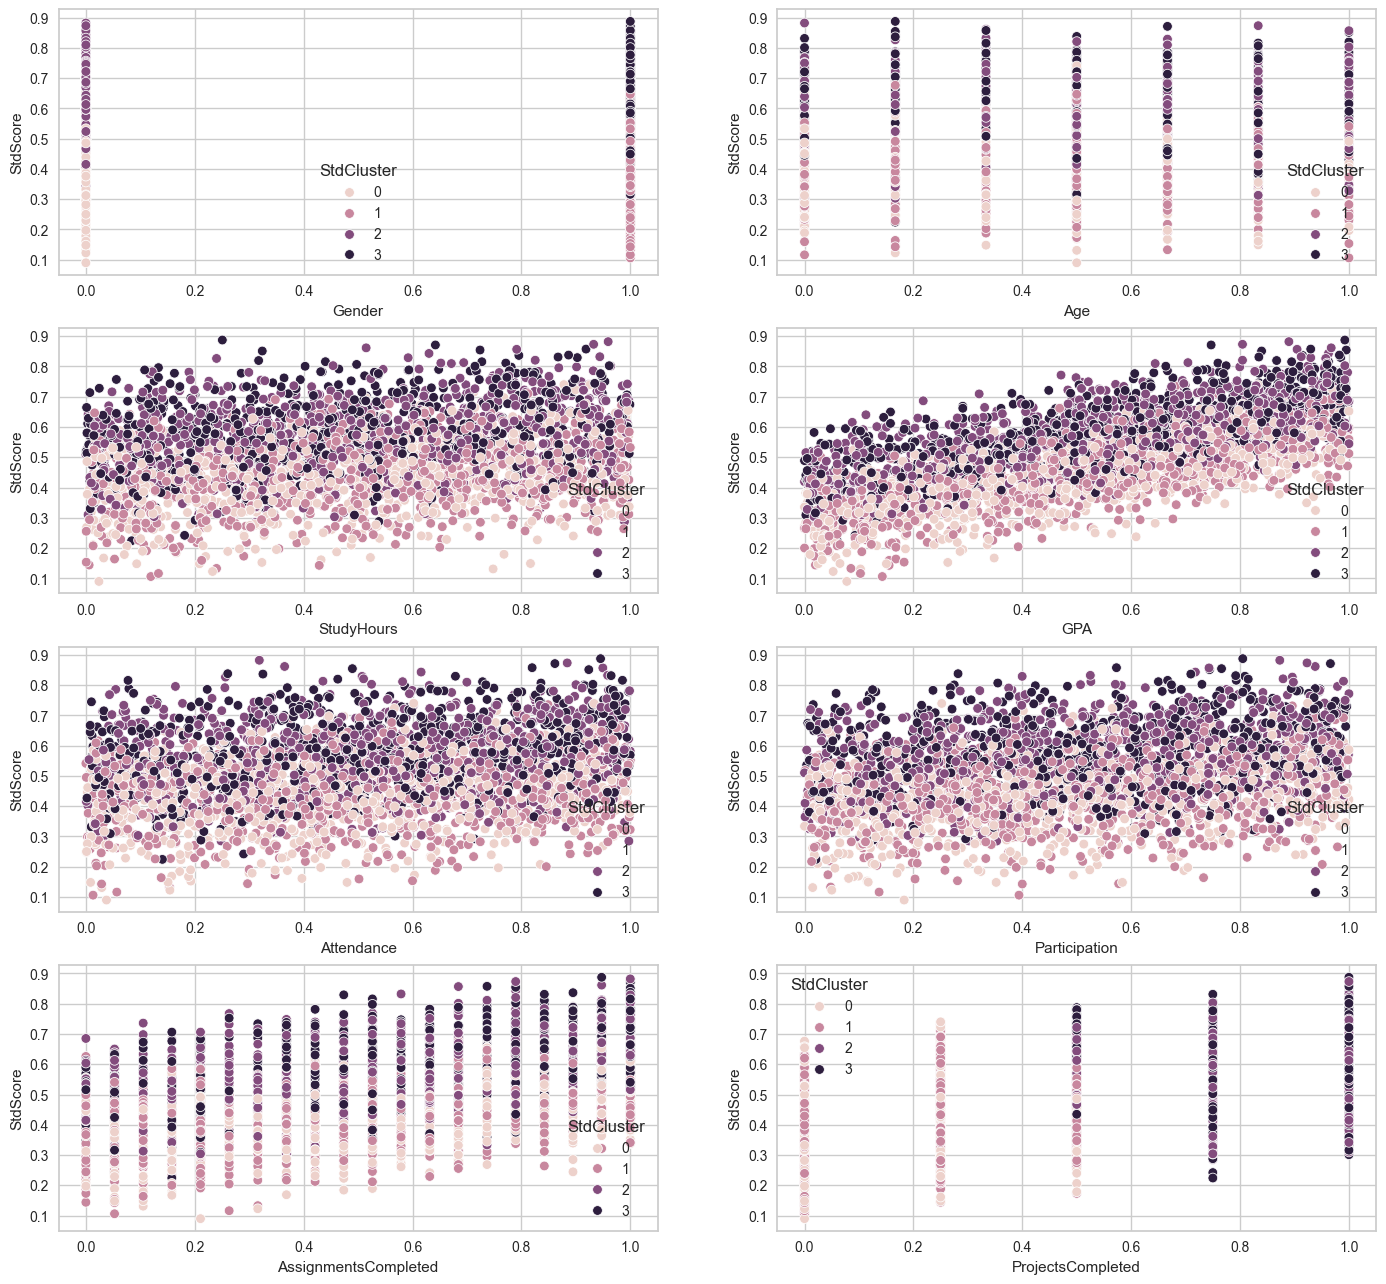

In [ ]:
# Scatter plots of fields
plt.figure(figsize=(17, 20))

for i, col in enumerate(compare_cols[:-1]):
    plt.subplot(5, 2, i+1)
    sns.scatterplot(data=std_cluster, x=col, y='StdScore', hue='StdCluster', markers=0.1)
plt.show()